In [62]:
# https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/
import cv2
import matplotlib.pyplot as plt
placa = []
import math
import numpy as np

In [63]:
# funciones Filtro Gabor
def build_filters():
 filters = []
 ksize = 31
 for theta in np.arange(0, np.pi, np.pi / 16):
     kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
     kern /= 1.5*kern.sum()
     filters.append(kern)
 return filters
 
def process(img, filters):
 accum = np.zeros_like(img)
 for kern in filters:
     fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
     np.maximum(accum, fimg, accum)
 return accum

In [115]:
# Lee la imagen a procesar
#image = cv2.imread('huella.jpg')
image = cv2.imread('test04.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
# aplica los filtros 
#-------------- Averaging
blur_gray = cv2.blur(gray,(5,5))
#-------------- blur 2D
kernel = np.ones((5,5),np.float32)/25
#Filtra la imagen utilizando el kernel anterior
blur2d_gray = cv2.filter2D(gray,-1,kernel)
blur_gray = cv2.filter2D(gray,-1,kernel)
#--------------Gaussian Filtering
Gaussian_gray = cv2.GaussianBlur(gray,(11,11),0)
#blur_gray = cv2.GaussianBlur(gray,(11,11),0)
#--------------Median Filtering
Median_gray = cv2.medianBlur(gray,11)
#--------------Bilateral Filter
Bilateral_gray = cv2.bilateralFilter(gray,11,75,75)

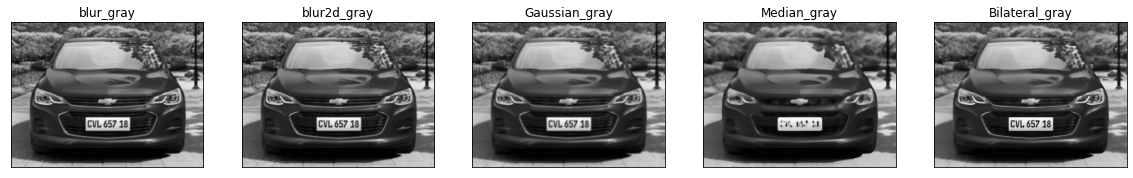

In [116]:
# despliega imagenes filtradas
plt.figure(figsize=(20,10))
plt.subplot(2,5,1),plt.imshow(cv2.cvtColor(blur_gray , cv2.COLOR_BGR2RGB));plt.title('blur_gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,2),plt.imshow(cv2.cvtColor(blur2d_gray , cv2.COLOR_BGR2RGB));plt.title('blur2d_gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,3),plt.imshow(cv2.cvtColor(Gaussian_gray , cv2.COLOR_BGR2RGB));plt.title("Gaussian_gray"), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,4),plt.imshow(cv2.cvtColor(Median_gray , cv2.COLOR_BGR2RGB));plt.title("Median_gray"), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,5),plt.imshow(cv2.cvtColor(Bilateral_gray , cv2.COLOR_BGR2RGB));plt.title("Bilateral_gray"), plt.xticks([]), plt.yticks([])
plt.show()

define aplicación de los filtros espaciales.

In [117]:
# aplicación filtro canny sobre imagen 
canny = cv2.Canny(blur_gray,150,200)

In [118]:
# aplicación filtro Gabor sobre imagen
filters = build_filters()
gabor = process(blur_gray, filters)

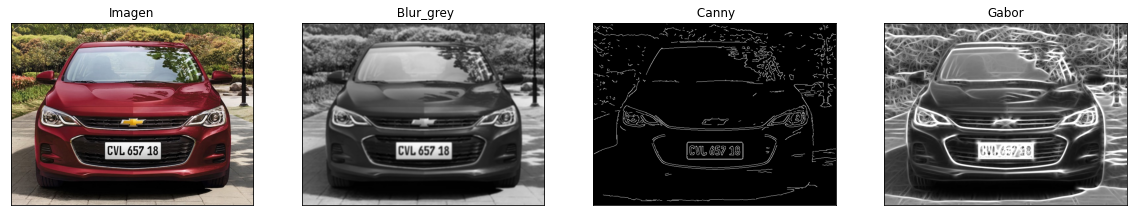

In [119]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1),plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB));plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,2),plt.imshow(cv2.cvtColor(blur_gray , cv2.COLOR_BGR2RGB));plt.title(' Blur_grey'), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,3),plt.imshow(cv2.cvtColor(canny , cv2.COLOR_BGR2RGB));plt.title(" Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,4),plt.imshow(cv2.cvtColor(gabor , cv2.COLOR_BGR2RGB));plt.title("Gabor"), plt.xticks([]), plt.yticks([])
plt.show()

Aplicación filtros morfologicos
1.- Dilate sobre Canny
2.- Dilate sobre Gabo
3.- Erosion sobre Canny
4.- Erosion sobre Gabo

In [120]:
# aplicación filtro dilate sobre Canny
dilate_canny = cv2.dilate(canny,None,iterations=1)
# importante para reconocer matricula
cnts,_ = cv2.findContours(dilate_canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [121]:
# aplicación filtro dilate sobre Gabor
dilate_gabor = cv2.dilate(gabor,None,iterations=1)
#cnts,_ = cv2.findContours(gabor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [122]:
# aplicacion filtro Erosion sobre Canny
kernel = np.ones((5,5),np.uint8)
erosion_canny = cv2.erode(canny,kernel,iterations = 1)

In [123]:
# aplicación filtro Erosion sobre Gabor
kernel = np.ones((5,5),np.uint8)
erosion_gabor = cv2.erode(gabor,kernel,iterations = 1)
#cnts,_ = cv2.findContours(erosion_gabor,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

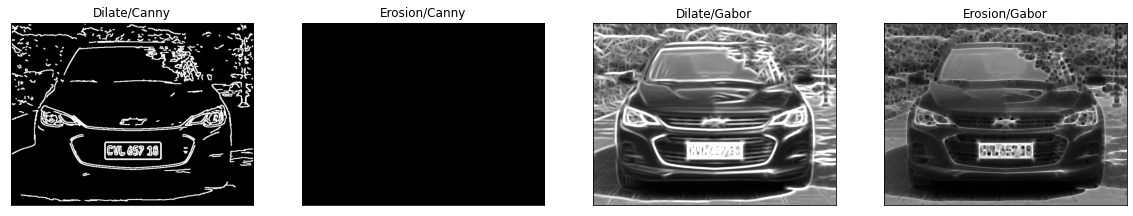

In [124]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1),plt.imshow(cv2.cvtColor(dilate_canny , cv2.COLOR_BGR2RGB));plt.title("Dilate/Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,2),plt.imshow(cv2.cvtColor(erosion_canny , cv2.COLOR_BGR2RGB));plt.title("Erosion/Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,3),plt.imshow(cv2.cvtColor(dilate_gabor , cv2.COLOR_BGR2RGB));plt.title('Dilate/Gabor'), plt.xticks([]), plt.yticks([])
plt.subplot(2,4,4),plt.imshow(cv2.cvtColor(erosion_gabor , cv2.COLOR_BGR2RGB));plt.title('Erosion/Gabor'), plt.xticks([]), plt.yticks([])
plt.show()

Busca el area de la matricula y la despliega

area= 9414.5


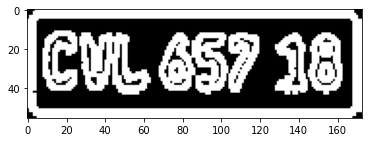

In [125]:
# solo funcioa con dilate / canny. No funciona con dilate / gabor.
for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if len(approx)==4 and area>9000:
    print('area=',area)
    cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>2.4:
      placa = dilate_canny[y:y+h,x:x+w]
      #placa = image[y:y+h,x:x+w]
      plt.imshow(cv2.cvtColor(placa , cv2.COLOR_BGR2RGB))
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      #cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)

-1

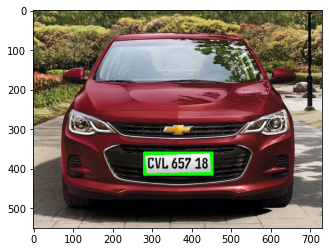

In [126]:
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
cv2.moveWindow('Image',45,10)
cv2.waitKey(0)